In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os,glob
import numpy as np
import tensorflow as tf
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
file_path="/content/drive/MyDrive/Skin canser Data/Train"

In [ ]:
name_class=os.listdir(file_path)
name_class

['seborrheic keratosis',
 'actinic keratosis',
 'melanoma',
 'basal cell carcinoma',
 'pigmented benign keratosis',
 'dermatofibroma',
 'vascular lesion',
 'nevus',
 'squamous cell carcinoma']

In [ ]:
filepaths=list(glob.glob(file_path+'/**/*.*'))

In [ ]:
filepaths

['/content/drive/MyDrive/Skin canser Data/Train/seborrheic keratosis/ISIC_0010890.jpg',
 '/content/drive/MyDrive/Skin canser Data/Train/seborrheic keratosis/ISIC_0010872.jpg',
 '/content/drive/MyDrive/Skin canser Data/Train/seborrheic keratosis/ISIC_0010878.jpg',
 '/content/drive/MyDrive/Skin canser Data/Train/seborrheic keratosis/ISIC_0010812.jpg',
 '/content/drive/MyDrive/Skin canser Data/Train/seborrheic keratosis/ISIC_0010860.jpg',
 '/content/drive/MyDrive/Skin canser Data/Train/seborrheic keratosis/ISIC_0010900.jpg',
 '/content/drive/MyDrive/Skin canser Data/Train/seborrheic keratosis/ISIC_0010810.jpg',
 '/content/drive/MyDrive/Skin canser Data/Train/seborrheic keratosis/ISIC_0010876.jpg',
 '/content/drive/MyDrive/Skin canser Data/Train/seborrheic keratosis/ISIC_0010863.jpg',
 '/content/drive/MyDrive/Skin canser Data/Train/seborrheic keratosis/ISIC_0010862.jpg',
 '/content/drive/MyDrive/Skin canser Data/Train/seborrheic keratosis/ISIC_0010883.jpg',
 '/content/drive/MyDrive/Skin ca

In [ ]:
labels=list(map(lambda x: os.path.split(os.path.split(x)[0])[1],filepaths))
labels

['seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',


In [ ]:
filepath = pd.Series(filepaths,name='Filepath').astype(str)
labels=pd.Series(labels,name='Label')
data=pd.concat([filepath,labels],axis=1)
data=data.sample(frac=1).reset_index(drop=True)
data.head(5)

,Filepath,Label
0,/content/drive/MyDrive/Skin canser Data/Train/...,dermatofibroma
1,/content/drive/MyDrive/Skin canser Data/Train/...,pigmented benign keratosis
2,/content/drive/MyDrive/Skin canser Data/Train/...,basal cell carcinoma
3,/content/drive/MyDrive/Skin canser Data/Train/...,pigmented benign keratosis
4,/content/drive/MyDrive/Skin canser Data/Train/...,melanoma


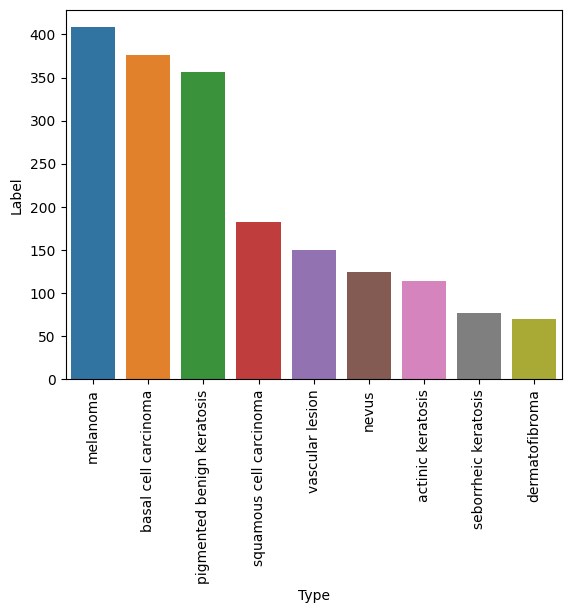

In [ ]:
counts=data.Label.value_counts()
sns.barplot(x=counts.index,y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [ ]:
train,test=train_test_split(data,test_size=0.25,random_state=42)

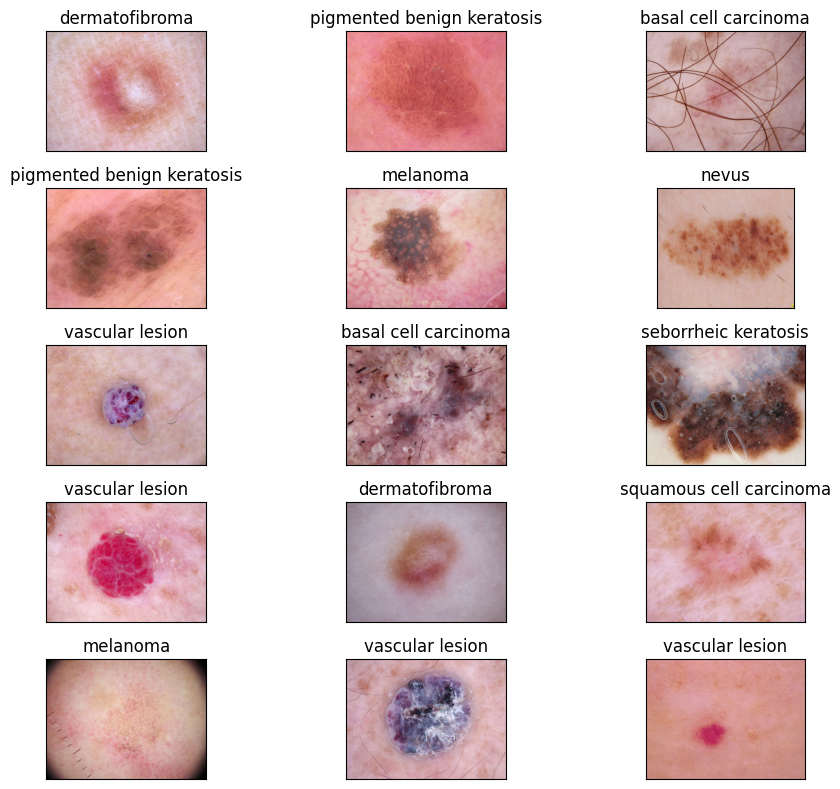

In [ ]:
fig,axes=plt.subplots(nrows=5,ncols=3,figsize=(10,8),subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
  ax.imshow(plt.imread(data.Filepath[i]))
  ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [ ]:
# Define your model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))


In [ ]:
# Compile the model with mean squared error (MSE) loss
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Skin canser Data/Train', target_size=(64, 64), batch_size=32, class_mode='binary')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Skin canser Data/Test', target_size=(64, 64), batch_size=32, class_mode='binary')

Found 1858 images belonging to 9 classes.
Found 101 images belonging to 9 classes.


In [ ]:
# Train the model
model.fit(train_set, steps_per_epoch=len(train_set), epochs=10, validation_data=test_set, validation_steps=len(test_set))

Epoch 1/10
59/59 [==============================] - 44s 727ms/step - loss: 13.2222 - accuracy: 0.2024 - val_loss: 12.6436 - val_accuracy: 0.1584
Epoch 2/10
59/59 [==============================] - 38s 638ms/step - loss: 13.1668 - accuracy: 0.2024 - val_loss: 12.6436 - val_accuracy: 0.1584
Epoch 3/10
59/59 [==============================] - 37s 634ms/step - loss: 13.1668 - accuracy: 0.2024 - val_loss: 12.6436 - val_accuracy: 0.1584
Epoch 4/10
59/59 [==============================] - 38s 634ms/step - loss: 13.1668 - accuracy: 0.2024 - val_loss: 12.6436 - val_accuracy: 0.1584
Epoch 5/10
59/59 [==============================] - 39s 656ms/step - loss: 13.1668 - accuracy: 0.2024 - val_loss: 12.6436 - val_accuracy: 0.1584
Epoch 6/10
59/59 [==============================] - 37s 643ms/step - loss: 13.1668 - accuracy: 0.2024 - val_loss: 12.6436 - val_accuracy: 0.1584
Epoch 7/10
59/59 [==============================] - 37s 635ms/step - loss: 13.1668 - accuracy: 0.2024 - val_loss: 12.6436 - val_ac

In [ ]:

# Evaluate the model and print accuracy
loss, accuracy = model.evaluate(test_set)
print(f"Test accuracy: {accuracy*100:.2f}%")

4/4 [==============================] - 4s 783ms/step - loss: 12.6436 - accuracy: 0.1584
Test accuracy: 15.84%


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

image_path = '/content/drive/MyDrive/Skin canser Data/Train/melanoma/ISIC_0000154.jpg'  # Update with the path to your image
img = image.load_img(image_path, target_size=(64, 64))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0
threshold = 0.5
prediction = model.predict(img)
if prediction > threshold:
    print("This is a melanoma keratosis skin cancer image.")
else:
    print("other cancer")


1/1 [==============================] - 0s 181ms/step
This is a melanoma keratosis skin cancer image.
